By: Ashley Vizcaino 
<div align="center">
<h1 style="color: #0294B9">Case Study 2 Bellabeat</h1>
</div>





<div style="width:200px; margin:0 auto;">
    
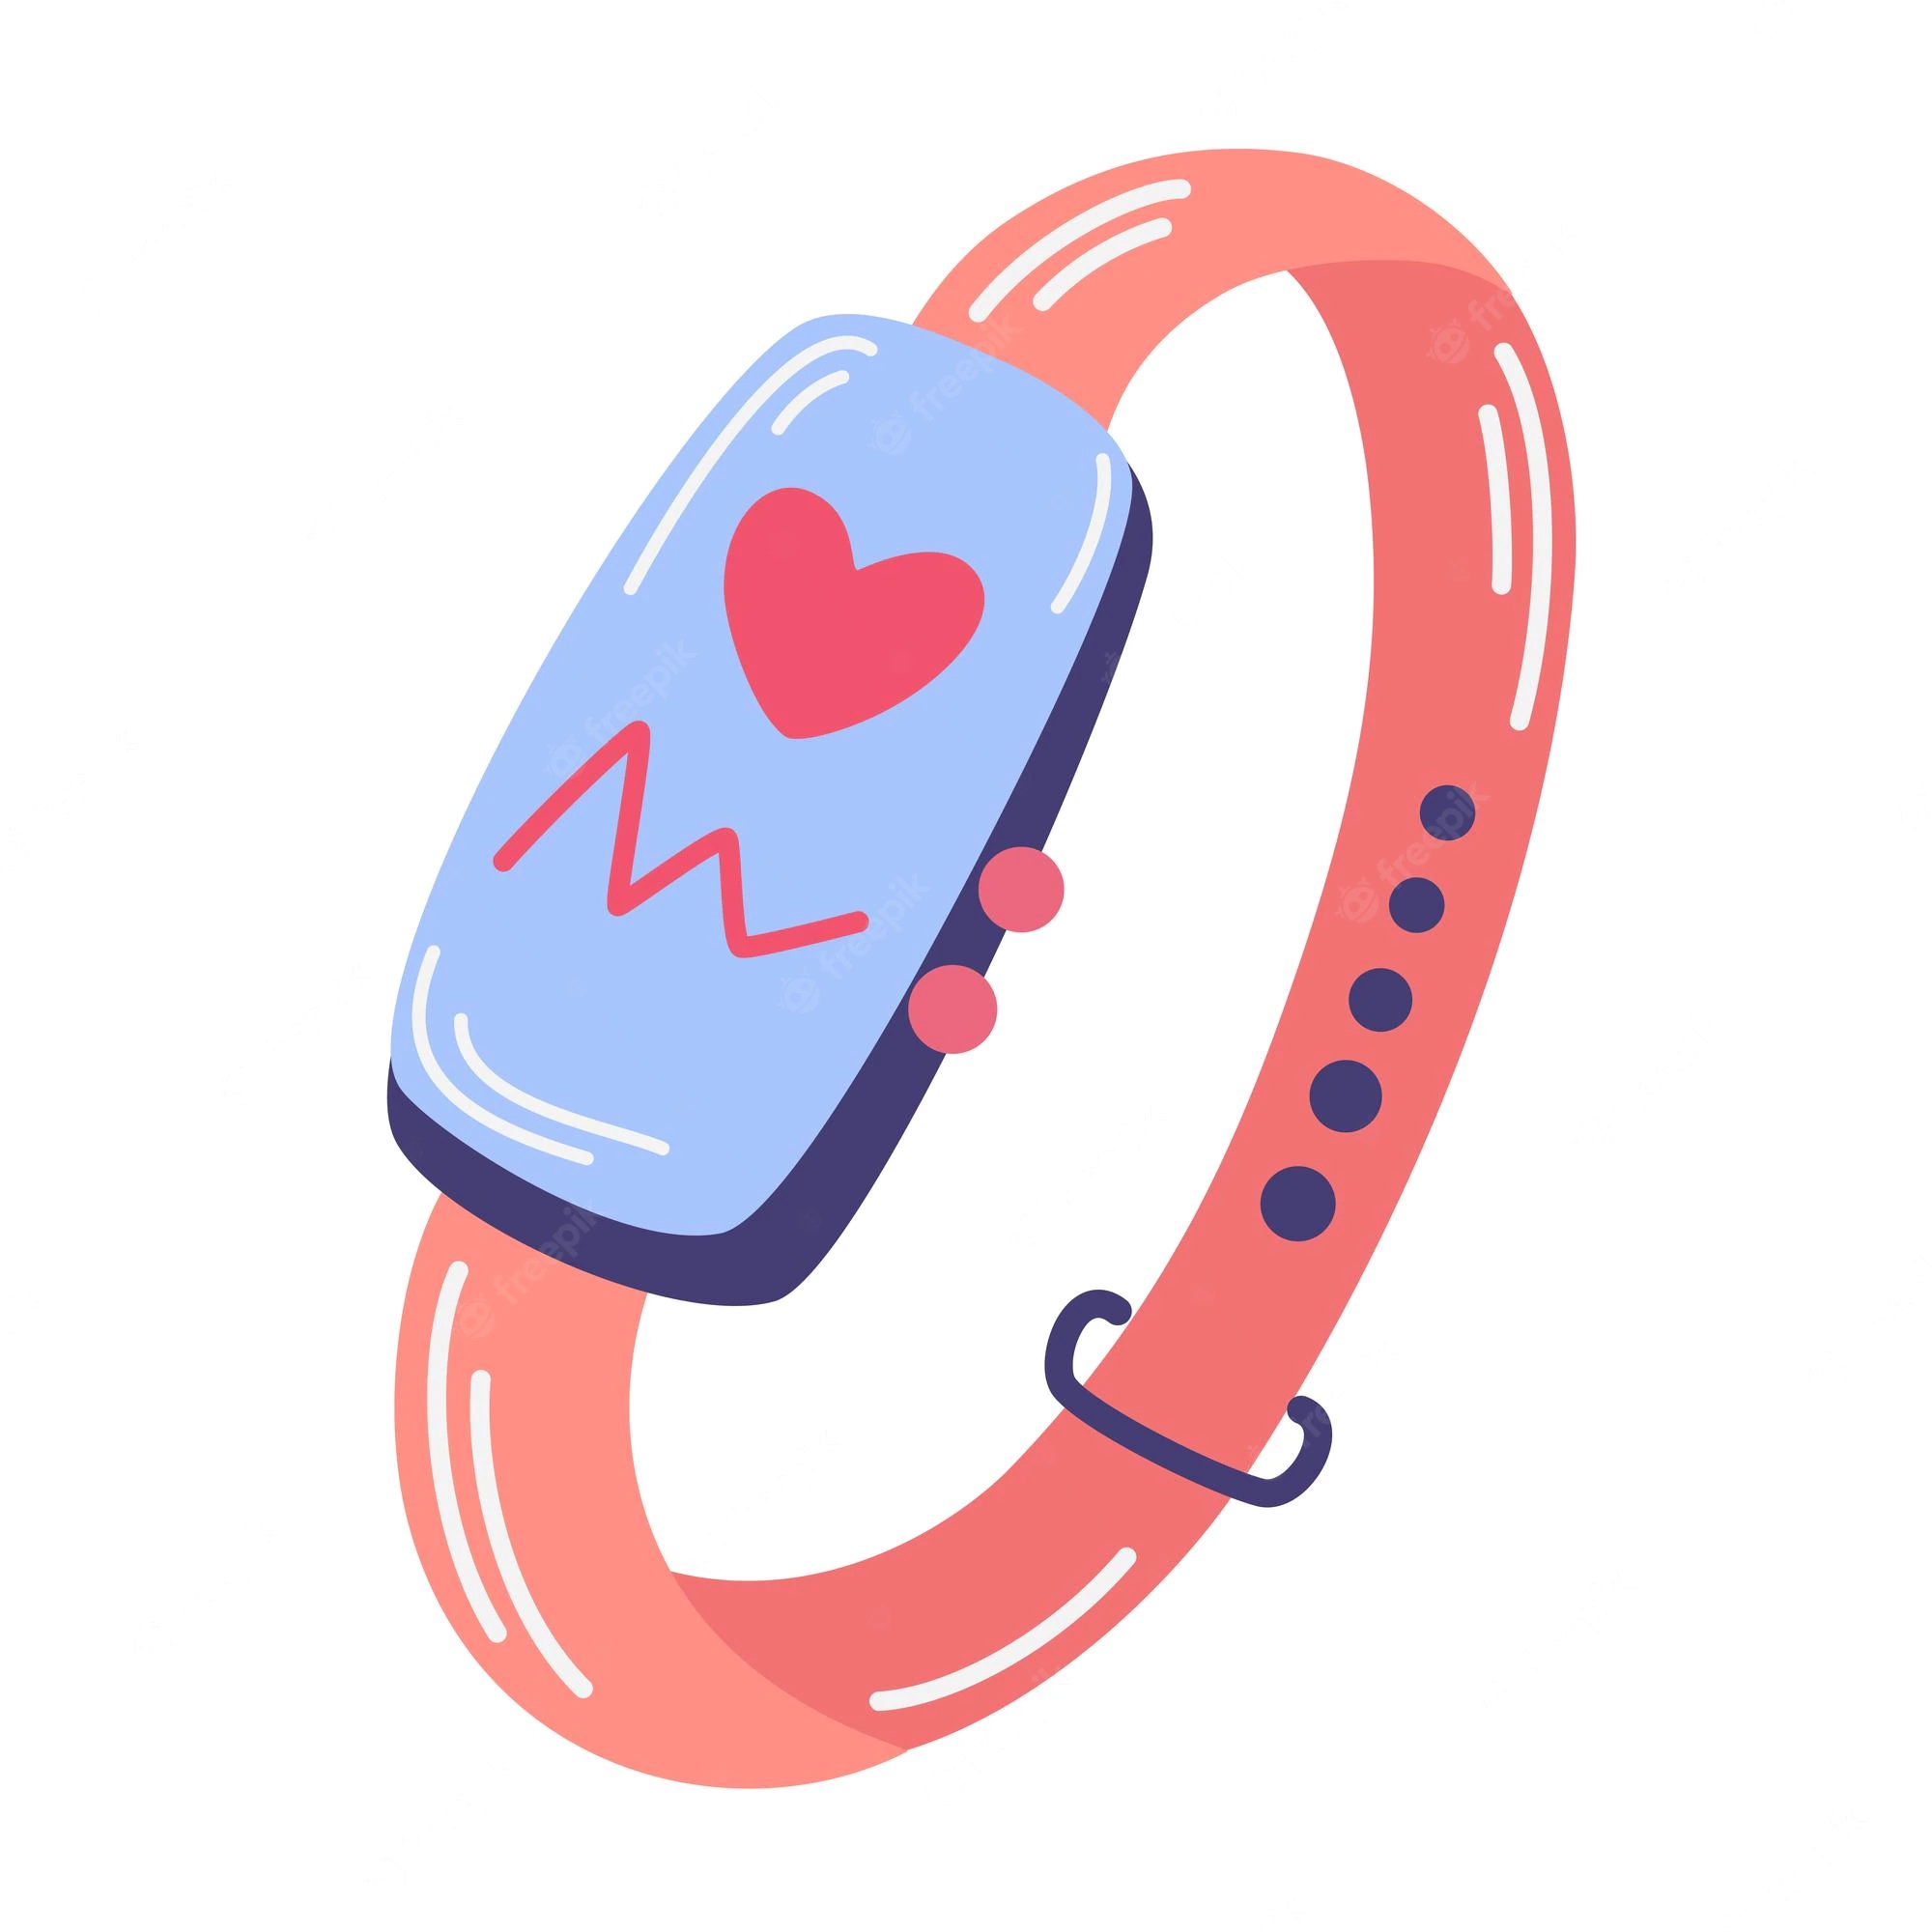
    
</div>

<nav>
  <h2 style="color: #0294B9">Table of Contents</h2>
  <ul>
    <li><a href="#Ask">Ask</a></li>
      <li><a href="#Preparingthedata">Preparing the data</a></li>
    <li><a href="#Process">Process</a></li>
    <li><a href="#Analyze">Analyze</a></li>
    <li><a href="#Act and Share">Act and Share</a></li>
  </ul>
</nav>

<h2 id="Ask" style="color: #0294B9">Ask</h2>

<p>The purpose of this analysis is to gain a deeper understanding of the Leaf bracelet , a product from the wearable health and wellness company Bellabeat. By analyzing the usage data of the FITBIT smart device, I aim to learn more about how people are currently using their devices. Specifically, I want to identify trends and patterns in the data that will help us improve our understanding of consumer usage. To achieve this goal, I will need to analyze data on customer demographics, product usage, and sales data. We will also need to perform statistical analyses to identify significant trends and patterns in the data. Based on my findings, I will make recommendations for how to optimize our marketing efforts and improve product performance.</p>


<h2 id="Preparingthedata" style="color: #0294B9">Preparing the data</h2>

<h4 style="font-size: 5; color: #B92702">Data Sources</h4>

<p>The data source for this analysis is a public dataset called the FitBit Fitness Tracker Data, which was made available through Mobius on Kaggle under the CC0: Public Domain license. The data set contains personal fitness tracker information from 30 Fitbit users, who participated in a distributed survey conducted via Amazon Mechanical Turk between 03.12.2016-05.12.2016. The data includes minute-level output for physical activity, heart rate, and sleep monitoring, and provides insights into the daily habits of smart device users.</p>

<h4 style="font-size: 5; color: #B92702">Tables used From FitBit Fitness Tracker Data</h4>

For my analysis, I used the following tables from the FitBit Fitness Tracker Data:
 <li>DailyActivity_merged</li>
 <li>DailyIntensities_merged</li>
 <li>Sleepday - sleepDay_merged</li>
 <li>DailySteps_merged </li>
 
 
<p>Before analyzing the data, I downloaded the three CSV files and imported them into Big Query for cleaning. During the data preparation process, I encountered an error message related to the timestamp format in the Sleepday - sleepDay_merged table. The error indicated that Big Query was unable to parse the timestamp '4/12/2016 12:00:00 AM' as a valid TIMESTAMP value due to the unrecognized time zone 'AM'. To fix this error, I modified the timestamp format in the CSV file to a format that is recognized by Big Query.</p>

<h2 id="Process" style="color: #0294B9"> Process</h2> 

To clean the data, I used SQL within Big Query to modify each table individually. The cleaning process is shown below.

<h4 style="font-size: 5; color: #B92702">Cleaning the data through SQL</h4>

<h4 style="font-size: 5; color: #0238b8"><li>Daily_activity table cleaning </li></h4>

Checking if there are any nulls in any columns in the daily_activity table



SELECT 
 
COUNT(*)
FROM bellabeat.daily_activity
 
WHERE ActivityDate IS NULL AND TotalSteps IS NULL AND TotalDistance IS NULL AND TrackerDistance IS NULL AND
LoggedActivitiesDistance IS NULL AND VeryActiveDistance IS NULL AND ModeratelyActiveDistance IS NULL AND
LightActiveDistance IS NULL AND SedentaryActiveDistance IS NULL AND VeryActiveMinutes IS NULL AND
FairlyActiveMinutes IS NULL AND LightlyActiveMinutes IS NULL AND SedentaryMinutes IS NULL AND Calories  IS NULL
;


Checking for duplicates and the quantity of activity entries 



<span style="color:#00778E;">Checking for duplicates grouped by the Id and activity dates</span>

SELECT Id, ActivityDate, COUNT(*) AS count

FROM bellabeat.daily_activity 

GROUP BY Id,  ActivityDate HAVING count > 1

ORDER BY count ASC;

<span style="color:#00778E;">Checking how many activity entries per day of all IDS </span>

SELECT ActivityDate, COUNT(*) AS activity_entries

FROM bellabeat.daily_activity 

GROUP BY  ActivityDate HAVING activity_entries > 1

ORDER BY activity_entries;

Validating the match of survey dates 04.12.2016-05.12.2016 and the SedentaryActiveDistance column in the daily_activity table should not be below zero since Sedentary means inactive.



<span style="color:#00778E;">Validating the match of survey dates 04.12.2016-05.12.2016</span>

SELECT
DISTINCT ActivityDate

FROM bellabeat.daily_activity

ORDER BY ActivityDate ;

SELECT COUNT(*) AS count_invalid 
FROM 
(SELECT SedentaryActiveDistance,
CASE WHEN SedentaryActiveDistance < 0.009 THEN 'valid' ELSE 'invalid' END AS validitity

FROM bellabeat.daily_activity)

WHERE validitity = 'invalid';




Counting the highest and lowest calories burned and noticing that there is 0 calories as the lowest. Therefore finding how many particpants have only 0 calories burned.


3 partipants have 0 calories for the same days of activity.

<span style="color:#00778E;">Counting the highest and lowest calories burned </span>
SELECT MAX(Calories) AS most_cals_burned

FROM bellabeat.daily_activity ;

SELECT MIN(Calories) AS least_cals_burned

FROM bellabeat.daily_activity ; 
 
<span style="color:#00778E;">Noticing that there is 0 calories as the lowest so now finding how many Id’s have 0 calories </span> 
SELECT *

FROM bellabeat.daily_activity

WHERE Calories = 0;

Finding how many participants have a LoggedActivitiesDistance that is greater than zero since zero is typically registered.


SELECT *

FROM bellabeat.daily_activity

WHERE LoggedActivitiesDistance > 0;
 


<h4 style="font-size: 5; color: #0238b8"><li>Daily_intense table cleaning </li></h4>

Checking if there are any nulls and duplicates any of the columns in the daily_intense table



 
SELECT
COUNT(*)

FROM bellabeat.daily_intense

WHERE ActivityDay IS NULL AND SedentaryMinutes IS NULL AND LightlyActiveMinutes IS NULL AND FairlyActiveMinutes IS NULL AND
VeryActiveMinutes IS NULL AND SedentaryActiveDistance IS NULL AND LightActiveDistance IS NULL AND ModeratelyActiveDistance IS NULL AND VeryActiveDistance IS NULL
;

<span style="color:#00778E;">Checking if there are any duplicates within the ID and activityday columns</span>

SELECT Id, ActivityDay, COUNT(*) AS count

FROM bellabeat.daily_intense

GROUP BY Id, ActivityDay

HAVING count > 1

ORDER BY count ASC;

Checking that there is different activity days per participant and validating the match of survey dates 04.12.2016-05.12.2016


<span style="color:#00778E;">Checking how many activity entries per day by the different Ids</span>

SELECT ActivityDay, COUNT(*) AS activityday_entries

FROM bellabeat.daily_intense

GROUP BY  ActivityDay HAVING activityday_entries > 1

ORDER BY activityday_entries;
 
<span style="color:#00778E;">Checking that each day has different Ids</span>

SELECT Id, ActivityDay

FROM bellabeat.daily_intense

ORDER BY ActivityDay;
 
<span style="color:#00778E;">Checking if the dates match the survey dates of 04.12.2016-05.12.2016</span>

SELECT
DISTINCT ActivityDay

FROM bellabeat.daily_intense

ORDER BY ActivityDay ;

Checking what is the most and least amount of minututes for the LightlyActiveMinutes and  FairlyActiveMinutes column 



<span style="color:#00778E;">Checking what is the most and least amount of minututes for the LightlyActiveMinutes column</span>
 
SELECT (SELECT MAX(LightlyActiveMinutes) 

FROM bellabeat.daily_intense) AS most_minutes,

(SELECT MIN(LightlyActiveMinutes) FROM bellabeat.daily_intense) AS least_minutes
;
 
<span style="color:#00778E;">Checking what is the most and least amount of minututes for the FairlyActiveMinutes column</span>
 
SELECT (SELECT MAX(FairlyActiveMinutes) 
FROM bellabeat.daily_intense) AS fairly_most_minutes,

(SELECT MIN(FairlyActiveMinutes) 
FROM bellabeat.daily_intense) AS fairly_least_minutes
;


Checking and counting the Outliers in the FairlyActiveMinutes column


<span style="color:#00778E;">Checking for Outliers in the FairlyActiveMinutes column</span>
 
SELECT FairlyActiveMinutes 

FROM bellabeat.daily_intense

WHERE FairlyActiveMinutes > (SELECT AVG(FairlyActiveMinutes) + 3 * 

STDDEV(FairlyActiveMinutes) FROM bellabeat.daily_intense) OR

FairlyActiveMinutes < (SELECT AVG(FairlyActiveMinutes) - 3 * 

STDDEV(FairlyActiveMinutes) FROM bellabeat.daily_intense);
 
<span style="color:#00778E;"> Counting the number of Outliers in the FairlyActiveMinutes column</span>

SELECT COUNT(*) AS outlier_count 

FROM (SELECT FairlyActiveMinutes FROM bellabeat.daily_intense

WHERE FairlyActiveMinutes > (SELECT AVG(FairlyActiveMinutes) + 3 * 

STDDEV(FairlyActiveMinutes) FROM bellabeat.daily_intense) OR

FairlyActiveMinutes < (SELECT AVG(FairlyActiveMinutes) - 3 *

STDDEV(FairlyActiveMinutes) FROM bellabeat.daily_intense) );


Creating another column that is called fair_validity that shows if the SedentaryActiveDistance is below 74 to make that an invalid number and counting the amount of invalid entries there are 



SELECT FairlyActiveMinutes,

CASE WHEN FairlyActiveMinutes < 74 THEN 'valid' ELSE 'invalid' END AS fair_validitity

FROM bellabeat.daily_intense
;


Checking what is the most and least amount of minutes for the VeryActiveMinutes column and checking for outliers and the total count of outliers. 


SELECT (SELECT MAX(VeryActiveMinutes) 

FROM bellabeat.daily_intense) AS very_most_minutes,

(SELECT MIN(VeryActiveMinutes) FROM bellabeat.daily_intense) AS very_least_minutes
;


<span style="color:#00778E;">Checking for Outliers in the VeryActiveMinutes column</span>

SELECT VeryActiveMinutes FROM bellabeat.daily_intense

WHERE VeryActiveMinutes > (SELECT AVG(VeryActiveMinutes) + 3 *

STDDEV(VeryActiveMinutes) FROM bellabeat.daily_intense) OR

VeryActiveMinutes < (SELECT AVG(VeryActiveMinutes) - 3 *

STDDEV(VeryActiveMinutes) FROM bellabeat.daily_intense);
 
 
 
<span style="color:#00778E;">Counting the number of Outliers in the VeryActiveMinutes column</span>

SELECT COUNT(*) AS very_outlier_count FROM (SELECT VeryActiveMinutes

FROM bellabeat.daily_intense

WHERE VeryActiveMinutes > (SELECT AVG(VeryActiveMinutes) + 3 * 

STDDEV(VeryActiveMinutes) FROM bellabeat.daily_intense) OR

VeryActiveMinutes < (SELECT AVG(VeryActiveMinutes) - 3 * 

STDDEV(VeryActiveMinutes) FROM bellabeat.daily_intense) );



Creating another column called very_validity that shows if VeryActiveMinutes is below 120 to make that an invalid number


SELECT VeryActiveMinutes,

CASE WHEN VeryActiveMinutes < 120 THEN 'valid' ELSE 'invalid' END AS very_validitity

FROM bellabeat.daily_intense;


The SedentaryActiveDistance column in the daily_intense table should not be below zero since Sedentary means inactive. I counted the highest and lowest SedentaryActiveDistance and creating another colum that called SedentaryActiveDistance_validitity that shows if SedentaryActiveDistance is below 0.01  and making that an invalid number. 



<span style="color:#00778E;">Counting the highest and lowest SedentaryActiveDistance</span>

SELECT (SELECT MAX(SedentaryActiveDistance) 

FROM bellabeat.daily_intense) AS largest_distance,

(SELECT MIN(SedentaryActiveDistance) FROM bellabeat.daily_intense) AS lowest_distance;
 

SELECT SedentaryActiveDistance,

CASE WHEN SedentaryActiveDistance < 0.01 THEN 'valid' ELSE 'invalid' 

END AS SedentaryActiveDistance_validitity

FROM bellabeat.daily_intense;

Since there are inconsistencies in the decimal places for the columns LightActiveDistance, ModeratelyActiveDistance, and VeryActiveDistance  I rounded all numbers by three decimal points.


SELECT ROUND(LightActiveDistance, 3) AS rounded_lightdistance,

ROUND(ModeratelyActiveDistance, 3) AS rounded_moddistance,

ROUND(VeryActiveDistance , 3) As rounded_verydistance

FROM bellabeat.daily_intense;


<h4 style="font-size: 5; color: #0238b8"><li>Daily_sleep table cleaning</li></h4>

Checking if there are any nulls and duplicates in any columns in the daily_sleep table. Also checking if the the dates match the survey dates of 04.12.2016-05.12.2016.



<span style="color:#00778E;">Counting any duplicates in the table</span>

SELECT *, COUNT(*) AS count

FROM bellabeat.daily_sleep

GROUP BY Id,SleepDay, TotalSleepRecords,TotalMinutesAsleep, 

TotalTimeInBed

HAVING count > 1;
 
<span style="color:#00778E;">Checking if there are any nulls in any columns in the daily_sleep table</span>
    
SELECT

COUNT(*)

FROM bellabeat.daily_sleep

WHERE Id IS NULL AND SleepDay IS NULL AND TotalSleepRecords IS NULL
AND TotalMinutesAsleep IS NULL AND

TotalTimeInBed IS NULL
;
 
<span style="color:#00778E;">Checking if the dates match the survey dates of 04.12.2016-05.12.2016</span>

SELECT

DISTINCT SleepDay

FROM bellabeat.daily_sleep

ORDER BY SleepDay ;

Checking what is the most and least amount of sleep records for the TotalSleepRecords and TotalMinutesAsleep column


<span style="color:#00778E;">Checking what is the most and least amount of sleep records for the TotalSleepRecords column</span>
 
SELECT (SELECT MAX(TotalSleepRecords)

FROM bellabeat.daily_sleep) AS most_sleep,

(SELECT MIN(TotalSleepRecords) 

FROM bellabeat.daily_sleep) AS least_sleep
;

<span style="color:#00778E;">Checking what is the most and least amount of sleep records for the TotalMinutesAsleep column</span>

SELECT (SELECT MAX(TotalMinutesAsleep ) 

FROM bellabeat.daily_sleep) AS most_mins_asleep,

(SELECT MIN(TotalMinutesAsleep) 

FROM bellabeat.daily_sleep) AS least_mins_asleep;


Creating another colum that called totalsleep_validitity that shows if TotalMinutesAsleep is below 61 and greater than 775 making that an invalid number



SELECT TotalMinutesAsleep,

CASE WHEN TotalMinutesAsleep > 61 OR TotalMinutesAsleep > 775 THEN 'valid' ELSE 'invalid' END AS totalsleep_validitity

FROM bellabeat.daily_sleep;

Checking what is the most and least amount of assuming minutes in bed for the TotalTimeInBed column. Also,checking the number of Outliers and creating another colum that called TotalTimeInBed_validitity that shows if TotalTimeInBed is below 61 and greater than 961  making that an invalid number.



<span style="color:#00778E;">Checking what is the most and least amount of assuming minutes in bed for the TotalTimeInBed column</span>

SELECT (SELECT MAX(TotalTimeInBed ) 

FROM bellabeat.daily_sleep) AS most_mins_bed,

(SELECT MIN(TotalTimeInBed) 

FROM bellabeat.daily_sleep) AS least_mins_bed;
 
<span style="color:#00778E;">Checking the number of Outliers in the TotalTimeInBed </span>

SELECT TotalTimeInBed FROM bellabeat.daily_sleep

WHERE TotalTimeInBed > (SELECT AVG(TotalTimeInBed) + 3 * 

STDDEV(TotalTimeInBed) FROM bellabeat.daily_sleep) OR

TotalTimeInBed < (SELECT AVG(TotalTimeInBed) - 3 * 

STDDEV(TotalTimeInBed) FROM bellabeat.daily_sleep) ;
 
<span style="color:#00778E;">Creating another column that called TotalTimeInBed_validitity that shows if TotalTimeInBed is below 61 and greater than 961  making that an invalid number and counting the amount of invalid entries there are</span>

 
SELECT TotalTimeInBed,

CASE WHEN TotalTimeInBed > 61 OR TotalTimeInBed > 961 THEN 'valid'

ELSE 'invalid' END AS TotalTimeInBed_validitity

FROM bellabeat.daily_sleep;
 


<h4 style="font-size: 5; color: #0238b8"><li>Daily_steps table cleaning</li></h4>

Checking if there are any nulls and duplicates in any columns in the daily_steps table. Also checking if the the dates match the survey dates of 04.12.2016-05.12.2016.



<span style="color:#00778E;">counting any duplicates in the table</span>

SELECT *, COUNT(*) AS count

FROM bellabeat.daily_steps

GROUP BY Id,ActivityDay,StepTotal

HAVING count > 1;
 
<span style="color:#00778E;">Checking if there are any nulls in any columns</span>
    
SELECT

COUNT(*)

FROM bellabeat.daily_steps

WHERE Id IS NULL AND ActivityDay IS NULL AND StepTotal IS NULL
;
 
<span style="color:#00778E;">Checking if the dates match the survey dates of 04.12.2016-05.12.2016</span>
    
SELECT

DISTINCT ActivityDay

FROM bellabeat.daily_steps

ORDER BY ActivityDay ;

<span style="color:#00778E;">Counting the number of Outliers in the StepTotal column</span>
    
SELECT StepTotal FROM bellabeat.daily_steps

WHERE StepTotal > (SELECT AVG(StepTotal) + 3 * STDDEV(StepTotal) 

FROM bellabeat.daily_steps) OR
StepTotal < (SELECT AVG(StepTotal) - 3 * STDDEV(StepTotal) 

FROM bellabeat.daily_steps) ;


<h2 id="Analyze" style="color: #0294B9">Analyze</h2>

<h4 style="font-size: 5; color: #B92702">Installing and loading packages</h4>

In [ ]:
install.packages('tidyverse')
library(tidyverse)
install.packages('dplyr')
library(dplyr)
install.packages('lubridate')
library(lubridate)
install.packages('janitor')
library(janitor)
library(ggplot2)
library(readr)


<h4 style="font-size: 5; color: #B92702"> Loading your CSV files</h4>

In [ ]:
daily_activity <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_intense <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
daily_sleep <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
daily_steps <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")


<h4 style="font-size: 5; color: #B92702">Checking to see if all tables load</h4>

In [ ]:
head(daily_activity)
head(daily_intense)
head(daily_sleep)
head(daily_steps)

<h4 style="font-size: 5; color: #B92702">Joining daily_intense and daily_sleep</h4>

I am joining these two data frames together to analyze how these two are correlated to each other. Through this join I will be answering different questions.

In [ ]:
activity_and_steps<- daily_activity %>%
full_join(daily_steps, by = "Id")




Showing the correlation between Total steps and Calories burned per participant from the new joined data frame

In [ ]:
steps_calories_by_id <- activity_and_steps %>%
  group_by(Id) %>%
  summarize(total_steps = sum(TotalSteps), calories = sum(Calories))
print(steps_calories_by_id)



Graphing the correlation between Calories and Totalsteps burned per participant from the new joined.

In [ ]:
ggplot(activity_and_steps, aes(x = Calories )) +
    geom_bar() +
  xlab("Totalcals") + ylab("Total steps") +
  ggtitle("Total Calories Burned by participants")


Calculating the Average Total Steps per participant from the new joined data frame

In [ ]:
average_totalsteps <- activity_and_steps %>%
  group_by(Id) %>%
  summarize(mean_steps = mean(TotalSteps))
print(average_totalsteps)


Calculating the Average calories per participant from the new joined data frame

In [ ]:
average_calories <- activity_and_steps %>%
  group_by(Id) %>%
  summarize(mean_calories = mean(Calories))
print(average_calories)


Calculating how many calories were burned by each participant correlating it their average of total steps

In [ ]:
 average_cal_steps <- activity_and_steps %>%
  group_by(Id) %>%
  summarize(mean_steps = mean(TotalSteps),
            mean_calories = mean(Calories))
print(average_cal_steps)


In [ ]:
ggplot(average_cal_steps, aes(x = mean_steps, y = mean_calories)) +
  geom_point() +
  geom_smooth() +
  xlab("Mean Steps") + ylab("Mean Calories Burned") +
  ggtitle("Mean Steps vs. Mean Calories Burned")

<h4 style="font-size: 5; color: #B92702">Joining daily_activity and daily_sleep</h4>

I am merging these two data frames together to analyze how these two are correlated to each other. Through this join I will be answering different questions.

In [ ]:
df_merged <- merge(daily_sleep, daily_activity, by = "Id")



Graphing the correlation between the TotalMinutesAsleep and VeryActiveDistance

In [ ]:
ggplot(df_merged, aes(x = TotalMinutesAsleep, y = VeryActiveDistance)) +
  geom_point()+
  ggtitle("Relationship Between Total Minutes Asleep and Very Active Distance")



Graphing the correlation between VeryActiveMinutes and VeryActiveDistance

In [ ]:

ggplot(data = daily_activity) +
    geom_bar(mapping = aes(x = VeryActiveMinutes, y = VeryActiveDistance),
             stat = "identity", fill = "#ae7855") +
    labs(title = "Very Active Distance compared to VeryActiveMinutes",
         subtitle = "Does more a more active state = a farther distance",
         x = "minutes",
         y = "distance") +
    theme_bw() +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

<h2 id="Act and Share" style="color: #0294B9">Act and Share</h2>

Based on the analysis of Fitbit data, it was found that those who wore their tracker during very active moments tended to have lower average sleep times. This goes against the popular belief that increased physical activity leads to increased tiredness. In fact, participants who were less active actually slept more. Additionally, it was found that those who took more steps in a day burned more calories compared to those who took fewer steps. Participants who traveled greater distances while being active also tended to spend less time sleeping. These insights could potentially be applied to the Bellabeat Leaf. By understanding the relationship between physical activity and sleep, the Leaf could potentially help users to optimize their daily activity levels and improve their overall well-being.
 
Some potential insights that Bellabeat could consider to apply to the leaf are:
 
 <li>Promote the idea that being more active during the day can help people sleep better at night, rather than just assuming that increased activity will lead to increased fatigue. </li>
 
 <li>Consider developing features or strategies that help people track and optimize their activity levels in order to improve sleep quality. </li>
 
 <li>Consider offering tips or resources for people who are struggling to get enough sleep, as this may be related to their activity levels or other factors </li>


